Rute terbaik: ['D', 'E', 'C', 'A', 'B']
Total jarak: 22.35103276995244


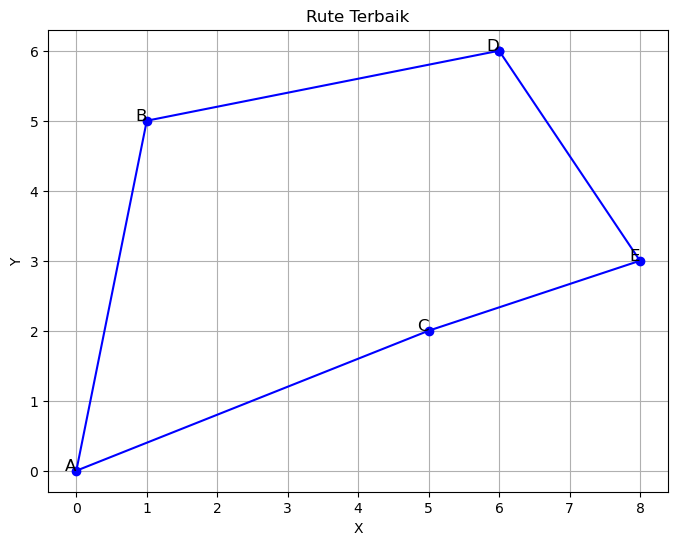

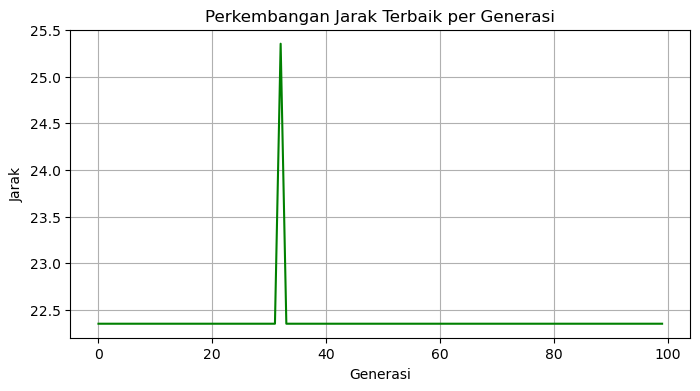

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Data kota dan koordinatnya
cities = {
    'A': (0, 0),
    'B': (1, 5),
    'C': (5, 2),
    'D': (6, 6),
    'E': (8, 3)
}

city_list = list(cities.keys())

# Fungsi menghitung jarak antar dua kota (Euclidean distance)
def distance(city1, city2):
    x1, y1 = cities[city1]
    x2, y2 = cities[city2]
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2)  # Perbaikan disini

# Fungsi menghitung total jarak satu rute
def route_distance(route):
    dist = sum(distance(route[i], route[i + 1]) for i in range(len(route) - 1))
    dist += distance(route[-1], route[0])  # kembali ke kota awal
    return dist

# Fungsi fitness
def fitness(route):
    return 1 / route_distance(route)

# Seleksi: tournament selection
def selection(population, k=3):
    selected = random.sample(population, k)
    selected.sort(key=lambda x: fitness(x), reverse=True)
    return selected[0]

# Crossover: Order Crossover (OX)
def crossover(parent1, parent2):
    size = len(parent1)
    start, end = sorted(random.sample(range(size), 2))
    child = [None] * size
    child[start:end] = parent1[start:end]
    ptr = end
    for city in parent2:
        if city not in child:
            while child[ptr % size] is not None:
                ptr += 1
            child[ptr % size] = city
    return child

# Mutasi: swap mutation
def mutate(route, mutation_rate=0.1):
    route = route[:]
    if random.random() < mutation_rate:
        i, j = random.sample(range(len(route)), 2)
        route[i], route[j] = route[j], route[i]
    return route

# Algoritma Genetika
def genetic_algorithm(generations=100, population_size=20):
    population = [random.sample(city_list, len(city_list)) for _ in range(population_size)]
    best_route = None
    best_fitness = 0
    history = []

    for gen in range(generations):
        new_population = []
        for _ in range(population_size):
            parent1 = selection(population)
            parent2 = selection(population)
            child = crossover(parent1, parent2)
            child = mutate(child)
            new_population.append(child)

        population = new_population
        gen_best = max(population, key=lambda x: fitness(x))
        gen_best_fitness = fitness(gen_best)
        history.append(route_distance(gen_best))

        if gen_best_fitness > best_fitness:
            best_fitness = gen_best_fitness
            best_route = gen_best

    return best_route, route_distance(best_route), history

# Menjalankan algoritma
best_route, best_distance, history = genetic_algorithm()
print("Rute terbaik:", best_route)
print("Total jarak:", best_distance)

# Visualisasi hasil
def plot_route(route):
    x = [cities[city][0] for city in route] + [cities[route[0]][0]]
    y = [cities[city][1] for city in route] + [cities[route[0]][1]]
    plt.figure(figsize=(8, 6))
    plt.plot(x, y, 'o-', color='blue')
    for city in route:
        plt.text(cities[city][0], cities[city][1], city, fontsize=12, ha='right')
    plt.title('Rute Terbaik')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True)
    plt.show()

# Visualisasi histori jarak selama generasi
def plot_history(history):
    plt.figure(figsize=(8, 4))
    plt.plot(history, color='green')
    plt.title('Perkembangan Jarak Terbaik per Generasi')
    plt.xlabel('Generasi')
    plt.ylabel('Jarak')
    plt.grid(True)
    plt.show()

# Tampilkan grafik
plot_route(best_route)
plot_history(history)
